<a href="https://colab.research.google.com/github/Laaliji/Image_processing_and_computer_vision_workshops/blob/main/detection_contours_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Détéction de contours**

### **Importation des bibliothèques**

### **Importation des bibliothèques**
Cette section importe les bibliothèques nécessaires pour la manipulation des images et leur affichage.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Création de l'image**

### **Création de l'image**
Cette fonction crée une image de 300x200 pixels avec différentes zones colorées.
- **Initialisation:** Une image blanche (255, 255, 255) est créée avec np.ones((200, 300, 3)) * 255.
- **Echelles:** Les dimensions sont définies dans une grille abstraite (20x18 unités) et converties en pixels (300/20 pour x, 200/18 pour y).
- **Couleurs:** Des tableaux NumPy définissent les couleurs RGB (rouge, jaune, orange, noir, vert, bleu).
- **Formes dessinées**:
    * Trois rectangles en haut : Rouge (5x8 unités), jaune (5x8), et orange (5x8), séparés par un espace de 1 unité.
    * Bande noire : Une bande horizontale de 2 unités de hauteur sous les rectangles.
    * Rectangle vert : Un rectangle central (10x10 unités) sous la bande noire.
    * Deux rectangles bleus : Un à gauche et un à droite (5x5 unités chacun), séparés du vert par un espace de 3 unités en bas.

L'image est construite en assignant les couleurs aux bonnes zones de pixels.

In [ ]:
# 1) Création de l'image A (300x200 pixels)
def creer_image_A():
    # Création d'une image blanche
    image_A = np.ones((200, 300, 3), dtype=np.uint8) * 255

    # Dimensions de l'image selon le schéma
    largeur_totale = 20
    hauteur_totale = 18

    # Facteurs d'échelle pour convertir les unités du schéma en pixels
    echelle_x = 300 / largeur_totale
    echelle_y = 200 / hauteur_totale

    # Couleurs
    rouge = np.array([255, 0, 0], dtype=np.uint8)
    jaune = np.array([255, 255, 0], dtype=np.uint8)
    orange = np.array([255, 120, 0], dtype=np.uint8)
    noir = np.array([0, 0, 0], dtype=np.uint8)
    vert = np.array([0, 255, 0], dtype=np.uint8)
    bleu = np.array([0, 0, 255], dtype=np.uint8)

    # Dimensions d'après le schéma
    rect_haut_largeur = int(5 * echelle_x)
    rect_haut_hauteur = int(8 * echelle_y)
    espace_entre_rect = int(1 * echelle_x)
    bande_noire_hauteur = int(2 * echelle_y)
    rect_vert_largeur = int(10 * echelle_x)
    rect_vert_hauteur = int(10 * echelle_y)
    rect_bleu_largeur = int(5 * echelle_x)
    rect_bleu_hauteur = int(5 * echelle_y)
    espace_bas = int(3 * echelle_y)

    # Dessiner les trois rectangles du haut (rouge, jaune, orange)
    # Rectangle rouge
    debut_x = 0
    debut_y = 0
    image_A[debut_y:debut_y+rect_haut_hauteur, debut_x:debut_x+rect_haut_largeur] = rouge

    # Rectangle jaune
    debut_x = rect_haut_largeur + espace_entre_rect
    image_A[debut_y:debut_y+rect_haut_hauteur, debut_x:debut_x+rect_haut_largeur] = jaune

    # Rectangle orange
    debut_x = 2 * rect_haut_largeur + 2 * espace_entre_rect
    image_A[debut_y:debut_y+rect_haut_hauteur, debut_x:debut_x+rect_haut_largeur] = orange

    # Bande noire
    debut_y = rect_haut_hauteur
    image_A[debut_y:debut_y+bande_noire_hauteur, :] = noir

    # Position Y après la bande noire
    debut_y = rect_haut_hauteur + bande_noire_hauteur

    # Rectangle vert central
    rect_vert_x = rect_haut_largeur
    rect_vert_y = debut_y
    image_A[rect_vert_y:rect_vert_y+rect_vert_hauteur, rect_vert_x:rect_vert_x+rect_vert_largeur] = vert

    # Rectangle bleu gauche
    rect_bleu_gauche_x = 0
    rect_bleu_gauche_y = debut_y + espace_bas
    image_A[rect_bleu_gauche_y:rect_bleu_gauche_y+rect_bleu_hauteur, rect_bleu_gauche_x:rect_bleu_gauche_x+rect_bleu_largeur] = bleu

    # Rectangle bleu droit
    rect_bleu_droit_x = rect_haut_largeur + rect_vert_largeur
    rect_bleu_droit_y = debut_y + espace_bas
    image_A[rect_bleu_droit_y:rect_bleu_droit_y+rect_bleu_hauteur, rect_bleu_droit_x:rect_bleu_droit_x+rect_bleu_largeur] = bleu

    return image_A

### **Création du négatif de l'image**

- Cette fonction crée le négatif de l'image en soustrayant chaque valeur RGB de 255 (255 - image).
- Exemple : Rouge (255, 0, 0) devient cyan (0, 255, 255).

In [ ]:
# 2) Créer le négatif de l'image A
def negatif(image):
    return 255 - image

### **Conversion en niveaux de gris selon la formule de la CIE**

- Transforme l'image RGB en niveaux de gris selon la formule CIE :
   * `Gris = 0,2125 × R + 0,7154 × G + 0,0721 × B`.
- Les composantes R, G, B sont extraites, la formule est appliquée, et le résultat est converti en uint8 (valeurs de 0 à 255).
- L'image devient un tableau 2D (un seul canal au lieu de trois).

In [ ]:
# 3) Fonction de conversion en niveaux de gris selon la formule de la CIE
def gris(image_rgb):
    # Extraction des composantes R, G, B
    R = image_rgb[:, :, 0].astype(float)
    G = image_rgb[:, :, 1].astype(float)
    B = image_rgb[:, :, 2].astype(float)

    # Application de la formule : Gris = 0,2125*R + 0,7154*G + 0,0721*B
    gris_naturel = 0.2125 * R + 0.7154 * G + 0.0721 * B

    # Conversion en uint8 pour l'affichage
    gris_uint8 = np.uint8(gris_naturel)

    # Création d'une image en niveaux de gris (1 seul canal)
    return gris_uint8


### **Détection de contours**

Cette partie calcule les gradients pour détecter les bordures dans l'image en niveaux de gris :

#### Composante horizontale du gradient

- Calcule la différence absolue entre chaque pixel et son voisin de droite `(image_int[:, 1:] - image_int[:, :-1])`.
- Résultat : met en évidence les changements horizontaux (bords verticaux).

In [ ]:
# a) Composante horizontale du gradient
def gradientH(image_gris):
    # Conversion en type entier pour éviter les problèmes de dépassement
    image_int = image_gris.astype(int)

    # Création d'un tableau vide pour le gradient horizontal
    grad_h = np.zeros_like(image_int)

    # Calcul du gradient horizontal (différence avec le pixel à droite)
    # Le gradient est calculé de gauche à droite, donc on va jusqu'à l'avant-dernière colonne
    grad_h[:, :-1] = np.abs(image_int[:, 1:] - image_int[:, :-1])

    return grad_h

#### Composante verticale du gradient

- Calcule la différence absolue entre chaque pixel et celui en dessous `(image_int[1:, :] - image_int[:-1, :])`.
- Résultat : met en évidence les changements verticaux (bords horizontaux).

In [ ]:
# b) Composante verticale du gradient
def gradientV(image_gris):
    # Conversion en type entier
    image_int = image_gris.astype(int)

    # Création d'un tableau vide pour le gradient vertical
    grad_v = np.zeros_like(image_int)

    # Calcul du gradient vertical (différence avec le pixel en dessous)
    # Le gradient est calculé de haut en bas, donc on va jusqu'à l'avant-dernière ligne
    grad_v[:-1, :] = np.abs(image_int[1:, :] - image_int[:-1, :])

    return grad_v

#### Combinaison des gradients et normalisation

- Combine les gradients horizontal et vertical en prenant le maximum des deux (np.maximum).
- Normalise les valeurs entre 0 et 255 pour l'affichage.

In [ ]:
# d) Combinaison des gradients et normalisation
def gradient_global(grad_h, grad_v):
    # Calcul de la norme du gradient (approximation: maximum des deux composantes)
    # On pourrait aussi utiliser la racine carrée de la somme des carrés: np.sqrt(grad_h**2 + grad_v**2)
    grad_global = np.maximum(grad_h, grad_v)

    # Normalisation du gradient pour l'affichage
    if np.max(grad_global) > 0:  # Éviter la division par zéro
        grad_global_norm = (grad_global / np.max(grad_global) * 255).astype(np.uint8)
    else:
        grad_global_norm = np.zeros_like(grad_global, dtype=np.uint8)

    return grad_global_norm

### **Programme principal**

- Appelle toutes les fonctions précédentes dans l'ordre :

    * Crée l'image A.
    * Génère son négatif.
    * Convertit en niveaux de gris (image B).
    * Calcule les gradients (horizontal, vertical, global).
- Affiche les résultats dans une grille 2x3 avec Matplotlib :
    * Première ligne : Image A, son négatif, image B (gris).
    * Deuxième ligne : Gradient horizontal, vertical, global.

### **Affichage de l'image**
Utilisation de `matplotlib` pour afficher l'image générée.

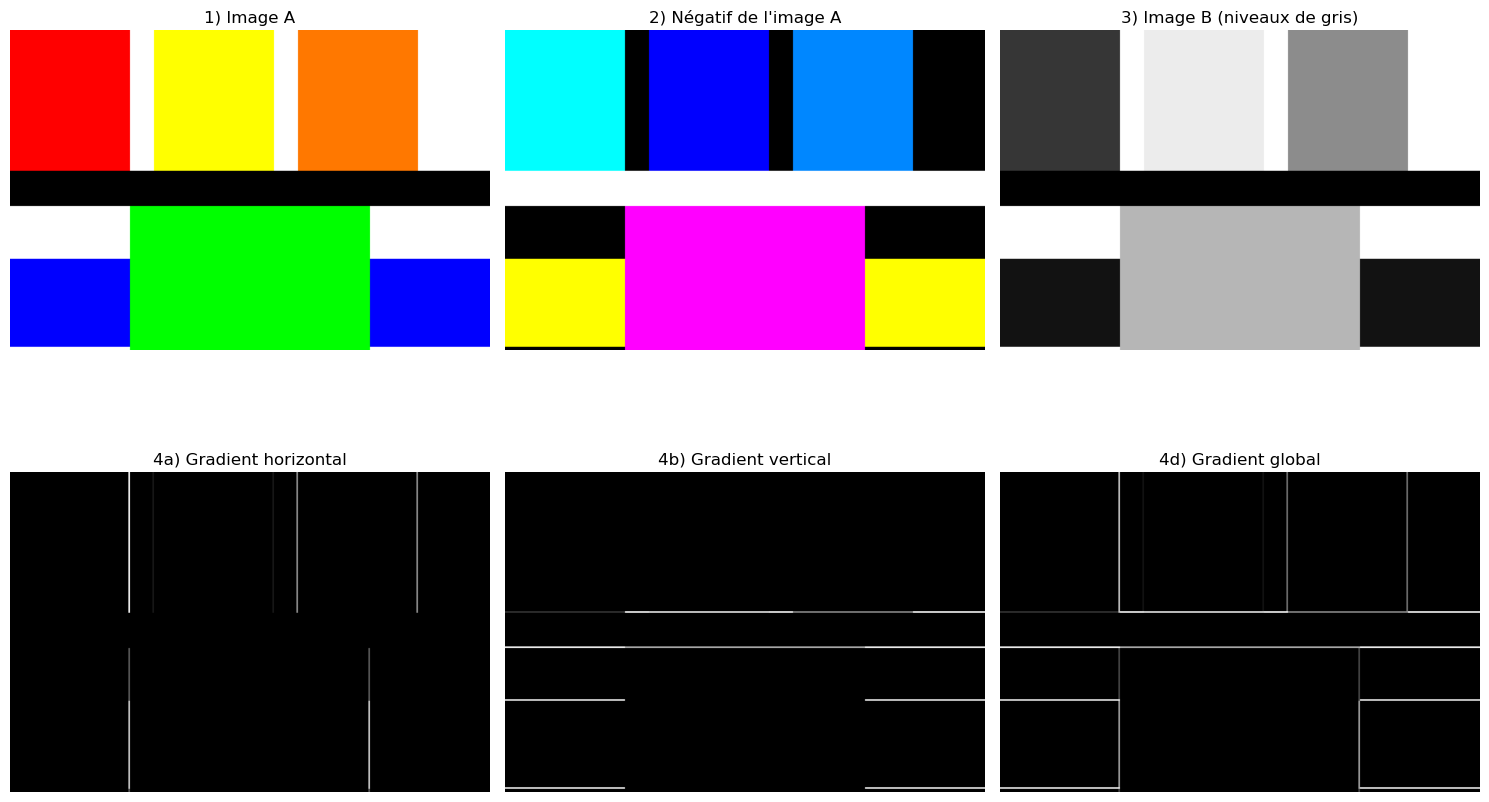

In [ ]:
# Fonction principale pour traiter et afficher les images
def traitement_complet():
    # 1) Création de l'image A
    image_A = creer_image_A()

    # 2) Création du négatif
    image_A_negatif = negatif(image_A)

    # 3) Conversion en niveaux de gris (image B)
    image_B = gris(image_A)

    # 4) Détection de contours
    # a) Gradient horizontal
    grad_h = gradientH(image_B)

    # b) Gradient vertical
    grad_v = gradientV(image_B)

    # d) Gradient global
    grad_global_norm = gradient_global(grad_h, grad_v)

    # Affichage des résultats
    plt.figure(figsize=(15, 10))

    # Première ligne: image A et son négatif
    plt.subplot(2, 3, 1)
    plt.imshow(image_A)
    plt.title("1) Image A")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(image_A_negatif)
    plt.title("2) Négatif de l'image A")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(image_B, cmap='gray')
    plt.title("3) Image B (niveaux de gris)")
    plt.axis('off')

    # Deuxième ligne: gradients
    plt.subplot(2, 3, 4)
    plt.imshow(grad_h, cmap='gray')
    plt.title("4a) Gradient horizontal")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(grad_v, cmap='gray')
    plt.title("4b) Gradient vertical")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(grad_global_norm, cmap='gray')
    plt.title("4d) Gradient global")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Exécution du programme
if __name__ == "__main__":
    traitement_complet()